# **Take home assignment 2**

# **Obective:**

To perform clustering, feature selection and feature engineering and PCA on the cars-mpg data set

## **Load the data, reflect the meta data, the versions , acknowledge the source of data.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from statsmodels.stats import weightstats as stests
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
# Versions:

print("Pandas version :" , pd.__version__)
print("Numpy version: ", np.__version__)
from sklearn import __version__
print("scikitlearn version :",__version__)
from platform import python_version
print("Python version: ",python_version())

Pandas version : 2.2.2
Numpy version:  1.26.4
scikitlearn version : 1.5.2
Python version:  3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Use KMeans clustering and check whether any natural clusters exist in the data**

a. Segregate all numerical columns into a separate dataframe. Assign a suitable name to the dataframe.

In [ ]:
cars_mpg_df = pd.read_csv('/content/drive/MyDrive/Term 4/EDA/Assignment/Feature engineering/cars-mpg.csv')

Acknowledgement: The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository.

https://archive.ics.uci.edu/dataset/9/auto+mpg

In [ ]:
# Car name being a object data type(srings) should be removed from the analysis.
cars_mpg_df = cars_mpg_df.drop('car name',axis=1)

In [ ]:
# printing few lines from the head
cars_mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [ ]:
# printing few lines from the tail
cars_mpg_df.tail()

,cyl,disp,hp,wt,acc,yr,mpg
393,4,140.0,86,2790,15.6,82,27.0
394,4,97.0,52,2130,24.6,82,44.0
395,4,135.0,84,2295,11.6,82,32.0
396,4,120.0,79,2625,18.6,82,28.0
397,4,119.0,82,2720,19.4,82,31.0


**Observations:**

The data has loaded successfully.

#### **Descriptive Statistics**

In [ ]:
cars_mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


#### **Observations**:

1. Since all columns have same number of records, it is indicated that there are no missing values in any of the columns.
2. The absence of Horsepower column suggests that the column has some data quality issues.

In [ ]:
cars_mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cyl     398 non-null    int64  
 1   disp    398 non-null    float64
 2   hp      398 non-null    object 
 3   wt      398 non-null    int64  
 4   acc     398 non-null    float64
 5   yr      398 non-null    int64  
 6   mpg     398 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


Horsepower (hp) data type is object not numeric. This shows non numerical charecters are present in this column.

In [ ]:
temp_hp=pd.DataFrame(cars_mpg_df.hp.str.isdigit()) # The 'isdigit' is a boolean function. Returns true if columns of a row contain
                                            # numeric value. Returns 'False' if it finds non-numeric values
                                            # temp_hp array will cotain 398 "True" or "False" enteries.
                                            # Those rows where any column has non-numeric, will have "False" in the array

temp_hp[temp_hp['hp'] == False] # Selecting all rows from the array which have "False"

,hp
32,False
126,False
330,False
336,False
354,False
374,False


Visual inspection shows that these 6 records have '?' in the hp column. Maybe the data entry operator left '?' where data was missing.

#### **Missing Value treatment steps**:

1. Replace '?' with NaN. This helps in using fillna function to replace the missing values.
2. Replace all the NaN values with the median of the horsepower column. (median is least affected by the preasence of outliers)

In [ ]:
cars_mpg_df=cars_mpg_df.replace('?',np.nan)

In [ ]:
#checking if the above code worked.
cars_mpg_df[cars_mpg_df.isnull().any(axis=1)]  #NaN is equal to null, hence we can use the isnull function to check whether the records with '?'
                                 # have been correctly imputed with NaN.

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,NaN,2046,19.0,71,25.0
126,6,200.0,NaN,2875,17.0,74,21.0
330,4,85.0,NaN,1835,17.3,80,40.9
336,4,140.0,NaN,2905,14.3,80,23.6
354,4,100.0,NaN,2320,15.8,81,34.5
374,4,151.0,NaN,3035,20.5,82,23.0


In [ ]:
cars_mpg_df['hp']=cars_mpg_df['hp'].astype('float16') #change the data type ofhorsepower to numeric data type.

In [ ]:
cars_mpg_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,392.0,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.5,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.5,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.0,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.0,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.5,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,126.0,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.0,5140.000000,24.800000,82.000000,46.600000


Hp column now has values in numerics.

#### **Handling missing values**

I will use the KNN imputation method to impute the missing hp valuies.

In [ ]:
# Indices where 'hp' values need imputation
indices_to_impute = [32, 126, 330, 336, 354, 374]

# Applying kNN imputer to the 'hp' column directly
imputer = KNNImputer(n_neighbors=5)
cars_mpg_df.loc[indices_to_impute, 'hp'] = imputer.fit_transform(cars_mpg_df[['hp']]).ravel()[indices_to_impute]

# Check the result
print(cars_mpg_df.loc[indices_to_impute, 'hp'])

32     104.5
126    104.5
330    104.5
336    104.5
354    104.5
374    104.5
Name: hp, dtype: float16


In [ ]:
# checking for missing values
indices_to_check = [32, 126, 330, 336, 354, 374]
print(cars_mpg_df.loc[indices_to_check, 'hp'].isna())

32     False
126    False
330    False
336    False
354    False
374    False
Name: hp, dtype: bool


In [ ]:
cars_mpg_df.describe().transpose() # transpose is only to get the column names on the vertical axis.

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.437500,38.187500,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


#### **Visualise the distributions using displot.**

<ipython-input-21-1b4d99bad977>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_mpg_df['cyl'], color='lightgreen')
<ipython-input-21-1b4d99bad977>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_mpg_df['disp'], color='lightgreen')
<ipython-input-21-1b4d99bad977>:9: UserWarning: 

`di

<Axes: xlabel='yr', ylabel='Density'>

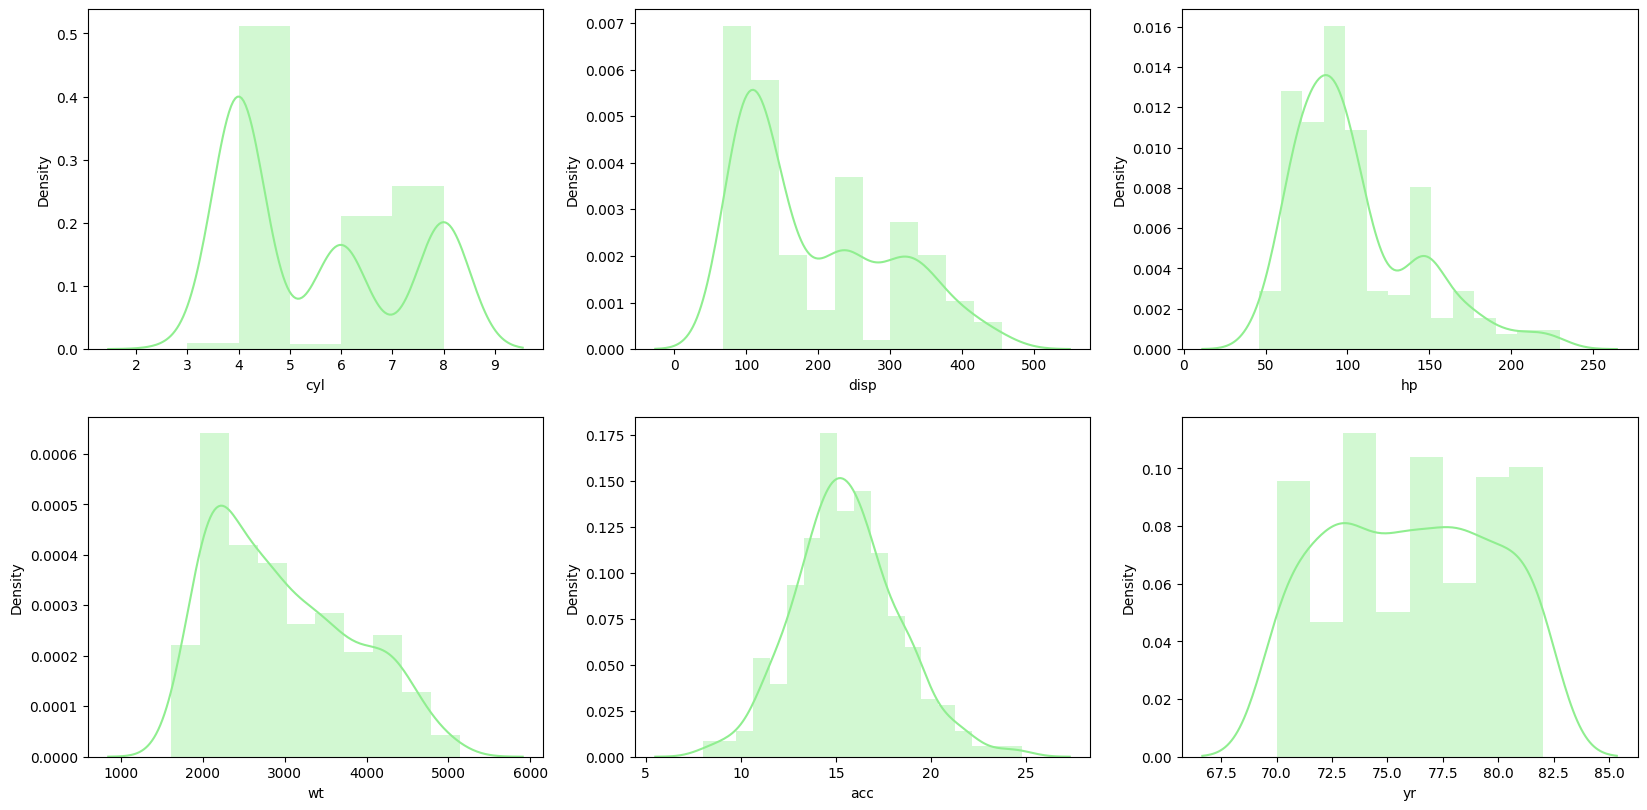

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.distplot(cars_mpg_df['cyl'], color='lightgreen')

plt.subplot(3,3,2)
sns.distplot(cars_mpg_df['disp'], color='lightgreen')

plt.subplot(3,3,3)
sns.distplot(cars_mpg_df['hp'], color='lightgreen')

plt.subplot(3,3,4)
sns.distplot(cars_mpg_df['wt'], color='lightgreen')

plt.subplot(3,3,5)
sns.distplot(cars_mpg_df['acc'], color='lightgreen')

plt.subplot(3,3,6)
sns.distplot(cars_mpg_df['yr'], color='lightgreen')

#### **Observations:**

1. We can see multiple peaks in the plot for cyl, this is because the column values are discrete.(4,6 and 8)

2. Variables disp,hp anf wt are right skewed indicating possible outliers.

3. Acc show a symmetric distribution which shows ver few cars with large and small values most have acceleration centered at 15 - 17 units. Most of the cars seem to be small and mid size.


Given the long tails in some distributions, let us analyze the distributions using box plot as that will highlight the outliers.

#### **Visualizing box plots:**



<Axes: xlabel='acc'>

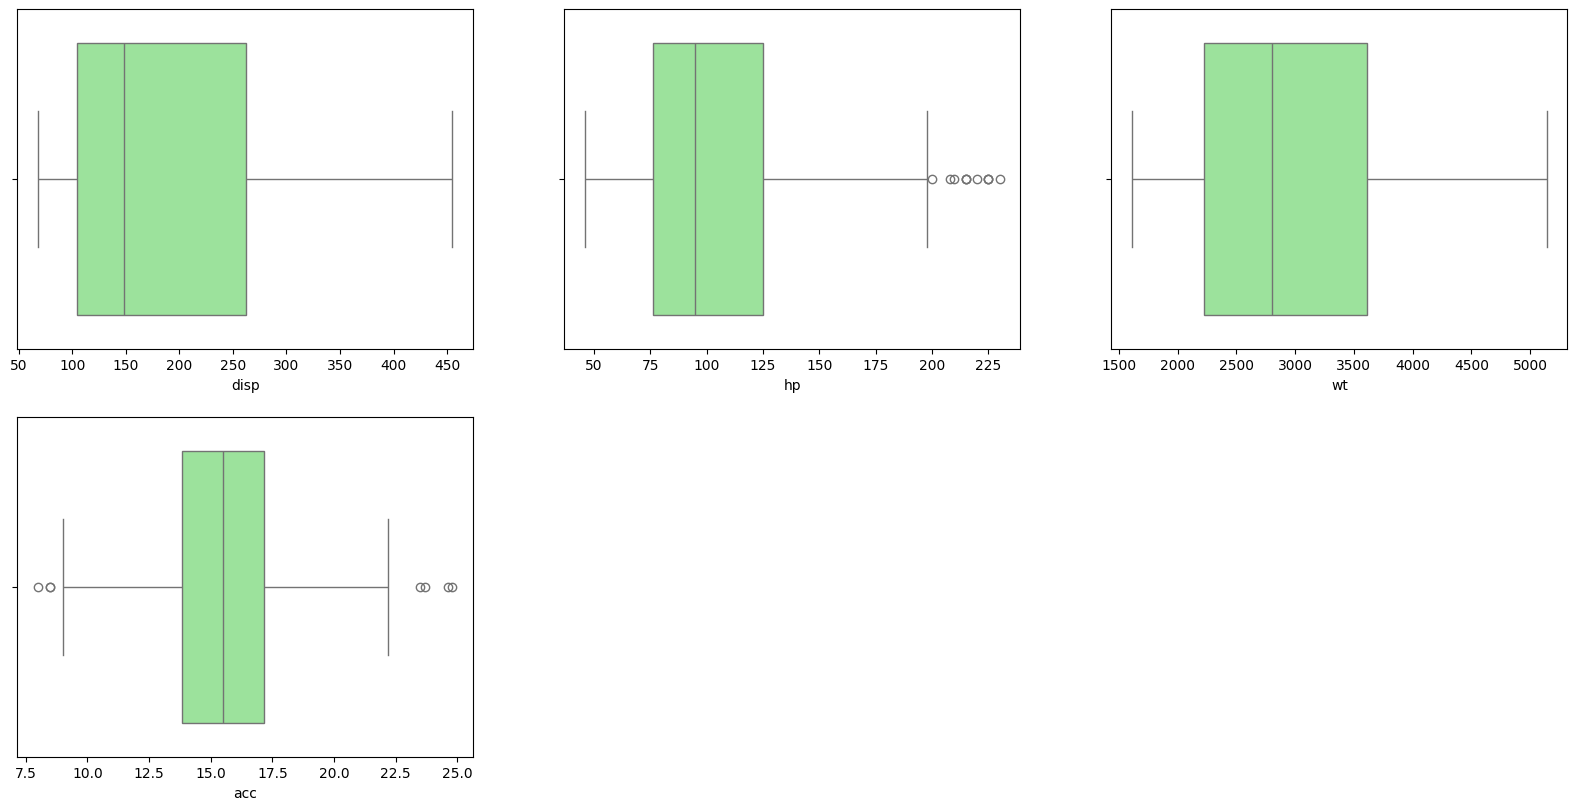

In [ ]:
#using boxplots to visualise the outliers
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= cars_mpg_df.disp, color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= cars_mpg_df.hp, color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x= cars_mpg_df.wt, color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x= cars_mpg_df.acc, color='lightgreen')

#### **Observations:**

1. Boxplot is done only for continuous variables.

2. Outliers (1.5 std deviations + or - 3rd quartile, 1st quartile respectively) are present only in hp and acc. Some use 1.5*IQR to define outliers. Any point beyone LL = Q1 - 1.5IQR , UL = Q3 + 1.5 IQR is an outlier.

3. Hp column seems to have cars with extreme high values for horsepower.

4. Acceleration column seems to have extreme values both on lower side and upper side.

5. The outliers could be because of typing errors or rare but possible casses.

6. Displacement column seems to have relatively large right skew in the body of the distribution though it does not have any outliers.

7. Given the outliers we need to explore the reasons for these outliers and fix them if required.

In [ ]:
# Identifying records in hp column that have outliers

temp_out_hp= (cars_mpg_df['hp']>190)
outliers = temp_out_hp[temp_out_hp==True]
print(outliers)

5      True
6      True
7      True
8      True
13     True
25     True
26     True
27     True
28     True
67     True
90     True
94     True
95     True
116    True
Name: hp, dtype: bool


In [ ]:
cars_mpg_df.iloc[outliers.index]

,cyl,disp,hp,wt,acc,yr,mpg
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
13,8,455.0,225.0,3086,10.0,70,14.0
25,8,360.0,215.0,4615,14.0,70,10.0
26,8,307.0,200.0,4376,15.0,70,10.0
27,8,318.0,210.0,4382,13.5,70,11.0
28,8,304.0,193.0,4732,18.5,70,9.0
67,8,429.0,208.0,4633,11.0,72,11.0


#### **Observations on hp outliers:**


1. All the cars have valid hp values as per the information on the web.

2. Some of these cars are rare as they were manufactured only in few numbers.

In [ ]:
# identifying outlier records in acc

temp_out_acc= (cars_mpg_df['acc']<10) | (cars_mpg_df['acc']>21)
outliers = temp_out_acc[temp_out_acc==True]
print(outliers)

6      True
7      True
9      True
11     True
12     True
59     True
116    True
195    True
196    True
209    True
244    True
299    True
300    True
325    True
326    True
328    True
394    True
Name: acc, dtype: bool


In [ ]:
cars_mpg_df.iloc[outliers.index]

,cyl,disp,hp,wt,acc,yr,mpg
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
9,8,390.0,190.0,3850,8.5,70,15.0
11,8,340.0,160.0,3609,8.0,70,14.0
12,8,400.0,150.0,3761,9.5,70,15.0
59,4,97.0,54.0,2254,23.5,72,23.0
116,8,400.0,230.0,4278,9.5,73,16.0
195,4,85.0,52.0,2035,22.2,76,29.0
196,4,98.0,60.0,2164,22.1,76,24.5
209,4,120.0,88.0,3270,21.9,76,19.0


#### **Observations for outliers in acceleration column:**

1. Acceleration column reflects the amount of time in seconds taken by a car to reach 60mph ( approx. 100kmh).

2. Some cars listed above have significantly lower acceleration (take more time to reach 60mph) than specified in their specs.

3. This could be due to the age factor (old cars have lower acceleration than specified) or a typo.

4. The strategies for replacing outliers could be as follows:

  a. Since there are cars whith similar age and brand but very low acceleration we can replace the outliers brandwise. However this can become a difficult option as the car names are not standardised.

  b. Replace outliers with values imputed using knn algorithm as this will ensure all similar cars have similar acceleration. However this may not be true in the real world. Two cars similar in size, weight, year of manufacture etc. may have different acceleration.

  c. Replace outliers with median of the column because median as a central value represents the charecteristic of all the cars. However this can be misleading as the charecteristicsof the car can be very different. for eg as small car will have larger acceleration value than a big heavy SUV.

  d. Group the cars based on charecteristics and replace the outliers groupwise. This approach is similar to knn and hence has the same drawback as knn.

  e. Replace the outliers with the quartile values ( also known as capping). Since most of the outliers are close to the edge of 1.5 std dev from the quartiles this method seems to be the safest approach compared to others in terms of the impact on the distribution charecteristics of the column.

5. In this case we are going to use the approach in 4.e. to replace outliers

6. Whichever approach we use should be verified by doing a hypothesis testing on the column before and after the outlier fixing. For eg. using paired t-test.

In [ ]:
cars_mpg_df_copy = cars_mpg_df.copy()

In [ ]:
 # Function to replace outliers with whisker values
def replace_outliers_with_whiskers(df, col):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  # Calculate Interquartile Range (IQR)
  IQR = Q3 - Q1
  # Define the lower and upper whisker
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR

  # Replace outliers lower than the lower whisker with the lower whisker

  df[col] = df[col].apply(lambda x: lower_whisker if x < lower_whisker else x)

  # Replace outliers greater than the upper whisker with the upper whisker
  df[col] = df[col].apply(lambda x: upper_whisker if x > upper_whisker else x)

  return df

In [ ]:
# Replace outliers in 'column_name'
cars_mpg_df_copy = replace_outliers_with_whiskers(cars_mpg_df_copy, 'hp')

cars_mpg_df_copy = replace_outliers_with_whiskers(cars_mpg_df_copy, 'acc')

In [ ]:
 '''Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)


cars_mpg_df_copy['hp']=cars_mpg_df_copy['hp'].clip(lower=cars_mpg_df_copy['hp'].quantile(0.05), upper=cars_mpg_df_copy['hp'].quantile(0.95))
cars_mpg_df_copy['acc']=cars_mpg_df_copy['acc'].clip(lower=cars_mpg_df_copy['acc'].quantile(0.05), upper=cars_mpg_df_copy['acc'].quantile(0.95))
'''

"Q1 = df[column].quantile(0.25)\n   Q3 = df[column].quantile(0.75)\n\n\ncars_mpg_df_copy['hp']=cars_mpg_df_copy['hp'].clip(lower=cars_mpg_df_copy['hp'].quantile(0.05), upper=cars_mpg_df_copy['hp'].quantile(0.95))\ncars_mpg_df_copy['acc']=cars_mpg_df_copy['acc'].clip(lower=cars_mpg_df_copy['acc'].quantile(0.05), upper=cars_mpg_df_copy['acc'].quantile(0.95))\n"

Now that the outliers have been replaced, lets plot the boxplots again to check if we've managed to get rid of the outliers.

<Axes: ylabel='hp'>

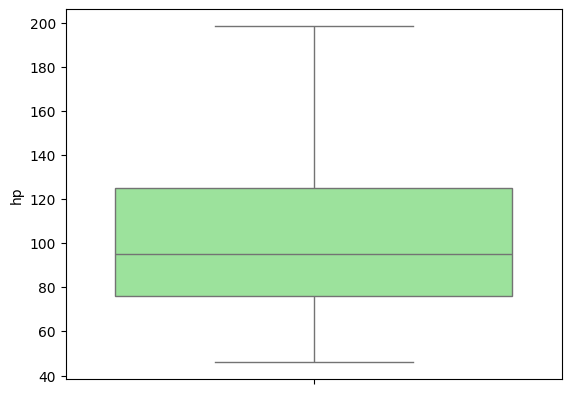

In [ ]:
sns.boxplot(cars_mpg_df_copy['hp'],color='lightgreen')

Note : Though in this case the outliers have been addressed for both the columns and we do not see any new outliers, this may not be the case all the time. The reason is by fixing outliers we modify the standard deveations (reduce) and as a result we reduce the vlaue of 1.5 standard deveation. Because of this reduced 1.5 standard deveation data points which were earlier not outliers may now appear as outliers. In case we observe new outliers we can ignore them and continue with our processing.

#### **Hypothesis Testing for impact of outlier fixing using dependent t test**

In [ ]:
# Ho : No significant difference in the distribution after outlier treatment
# Ha : There is a significant difference in the distribution after outlier treatment

# for hp column
t, pval= stats.ttest_ind(cars_mpg_df['hp'],cars_mpg_df_copy['hp'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.8378170098445731
fail to reject null hypothesis


Based on hypothesis testing of the horsepower column the stratergy of replacing outliers in horsepower with quartiles is OK as we fail to reject null hypothesis.

In [ ]:
# Ho : No significant difference in the distribution after outlier treatment
# Ha : There is a significant difference in the distribution after outlier treatment

# for acc column
t, pval= stats.ttest_ind(cars_mpg_df['acc'],cars_mpg_df_copy['acc'])
print(float(pval))
if pval<0.05:
    print('reject null hypothesis')
else:
    print('fail to reject null hypothesis')

0.9336919910906359
fail to reject null hypothesis


Since the outliers in the hp column were actual ground truth values, let us not fix those outliers

In [ ]:
#cars_mpg_df['hp']=cars_mpg_df_copy['hp'] # copyting data from the backup for horsepower column to eliminate the imputed values for outliers.

b. Standardize the data in this dataframe

In [ ]:
# Initializing the scaler
scaler = StandardScaler()

# Applying the scaler to the numerical DataFrame
cars_mpg_df_z = pd.DataFrame(scaler.fit_transform(cars_mpg_df), columns=cars_mpg_df.columns)

# Displaying the standardized DataFrame
cars_mpg_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.669184,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.586587,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.193414,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.193414,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.931299,0.565841,-1.840117,-1.627426,-0.834543


c. Generate an Elbow plot and share your findings.

In [ ]:
cluster_range = range( 1, 10)   # expect 2 to 4 clusters from the pair panel visual inspection hence restricting from 1 to 10
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_mpg_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1296.237923
2,3,947.900960
3,4,740.064023
4,5,666.808578
5,6,599.428904
6,7,541.412840
7,8,499.627451
8,9,455.388886


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

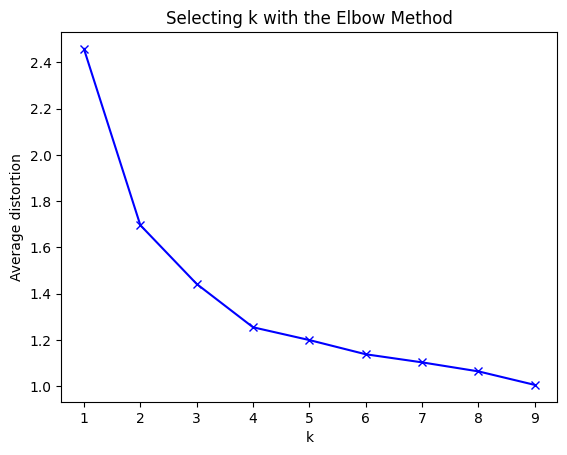

In [ ]:
# Finding the optimal number of clusters using Elbow method


clusters=range(1,10)  # creating one single cluster is useless, starting from two
meanDistortions=[] # array to hold within cluster variance, a.k.a inertia

for k in clusters:
    model= KMeans(n_clusters=k, random_state=1)
    model.fit(cars_mpg_df_z)
    prediction= model.predict(cars_mpg_df_z)
    meanDistortions.append(sum(np.min(cdist(cars_mpg_df_z, model.cluster_centers_, 'euclidean'), axis=1)) / cars_mpg_df_z.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')  # usign blue cross for every number of cluster value and mean distortion
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Note: we can replace calculation of meandistortion with another function called cluster.inertia that does all the calculation
# automatically
#meanDistortion.append(model.inertia_)

The elbow of the plot can be seen at k = 2. I will inspect clusters from 2 to 5 to determine which one of them gives a clear, meaningful grouping.

d. Regenerate the clusters using K value from the Elbow plot

e. Store the cluster id of every instance back into the original dataframe

f. Inspect the K clusters visually using boxplot and share your findings

Answer of the three are given below.

### **Clustering with k = 2**

In [ ]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(cars_mpg_df_z)   # defines two clusters
prediction=final_model.predict(cars_mpg_df_z)  # captures which cluster each data point in the datset belongs to

#Append the prediction
cars_mpg_df_z["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

In [ ]:
cars_mpg_df_z.groupby(['Group']).count()

,cyl,disp,hp,wt,acc,yr,mpg
Group,,,,,,,
0,276,276,276,276,276,276,276
1,122,122,122,122,122,122,122


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'hp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'yr'}, xlabel='[Group]'>, <Axes: >,
        <Axes: >]], dtype=object)

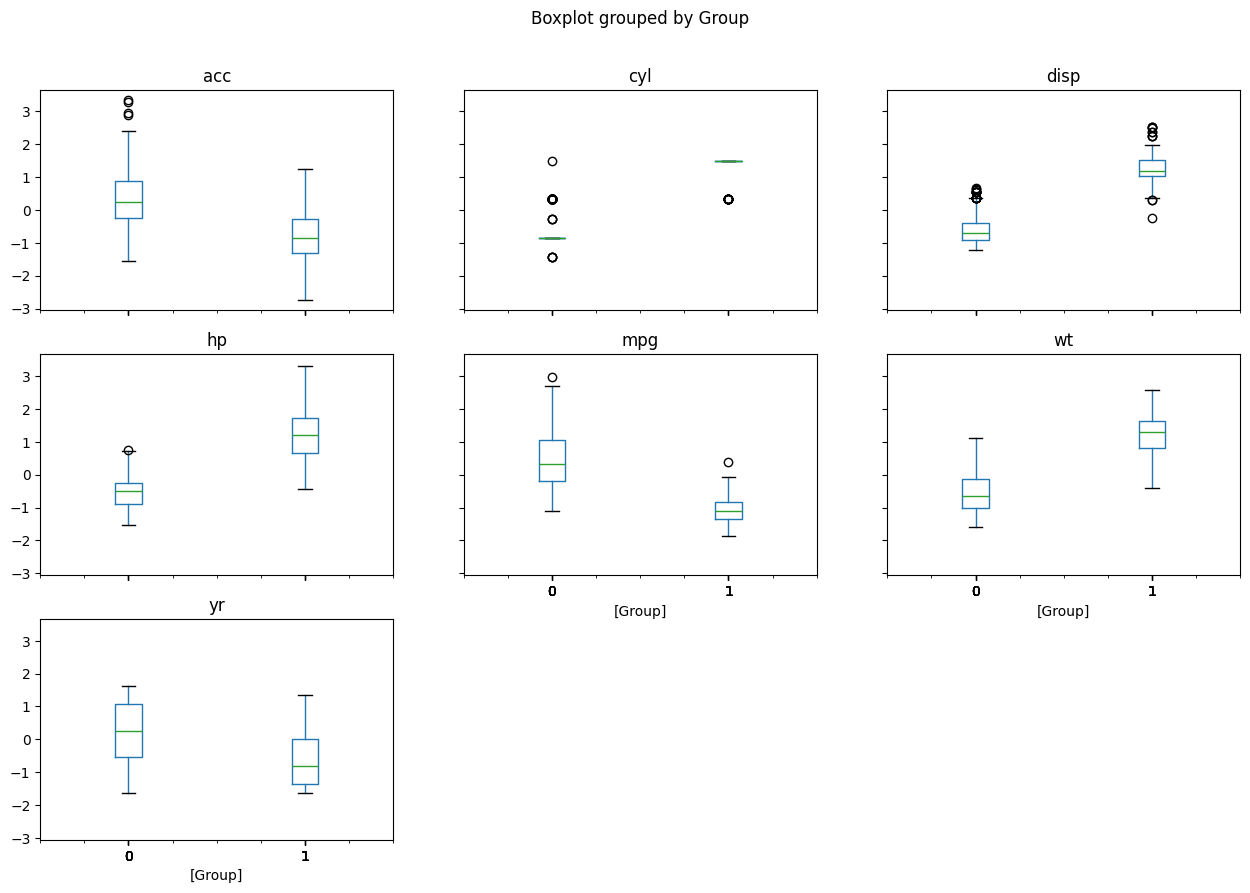

In [ ]:
cars_mpg_df_z.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)

The box plots of acc and yr for k = 2 are overlapping indicating presence of no natural clusters.

1. Clusters in disp, cyl, and mpg show several potential far from the whiskers in their respective clusters. They have a high potential of having outliers.

2. Clusters in hp and acc have fewer outliers and closer to the main distribution.

3. Clusters in wt and yr are consistent across clusters with no visible extreme points.

### **Clustering with k = 3**

In [ ]:
final_model=KMeans(3)
final_model.fit(cars_mpg_df_z)   # defines three clusters
prediction=final_model.predict(cars_mpg_df_z)  # captures which cluster each data point in the datset belongs to

#Append the prediction
cars_mpg_df_z["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

In [ ]:
cars_mpg_df_z.groupby(['Group']).count()

,cyl,disp,hp,wt,acc,yr,mpg
Group,,,,,,,
0,158,158,158,158,158,158,158
1,140,140,140,140,140,140,140
2,100,100,100,100,100,100,100


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'hp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'yr'}, xlabel='[Group]'>, <Axes: >,
        <Axes: >]], dtype=object)

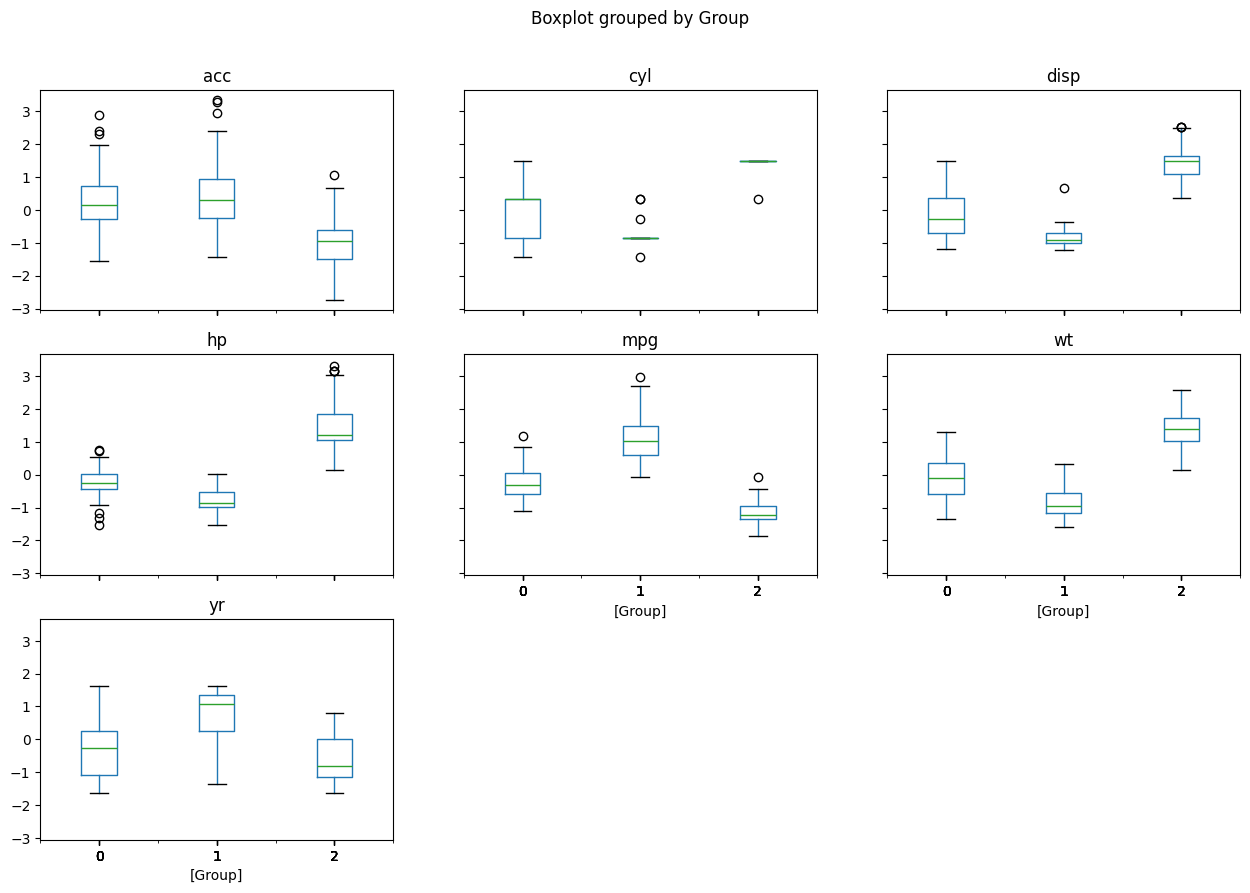

In [ ]:
cars_mpg_df_z.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)

Overallping exists in the cluster for all the features at k = 3 except for mpg and wt.

1. Clusters in disp, and cyl have potential outliers as they are far away from the whiskers.

2. Clusters in acc, hp, and mpg have outliers close to their whiskers.

3. Clusters in wt and yr have no outliers.

### **Clustering with k = 4**

In [ ]:
final_model=KMeans(4)
final_model.fit(cars_mpg_df_z)   # defines four clusters
prediction=final_model.predict(cars_mpg_df_z)  # captures which cluster each data point in the datset belongs to

#Append the prediction
cars_mpg_df_z["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

In [ ]:
cars_mpg_df_z.groupby(['Group']).count()

,cyl,disp,hp,wt,acc,yr,mpg
Group,,,,,,,
0,90,90,90,90,90,90,90
1,100,100,100,100,100,100,100
2,91,91,91,91,91,91,91
3,117,117,117,117,117,117,117


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'hp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'yr'}, xlabel='[Group]'>, <Axes: >,
        <Axes: >]], dtype=object)

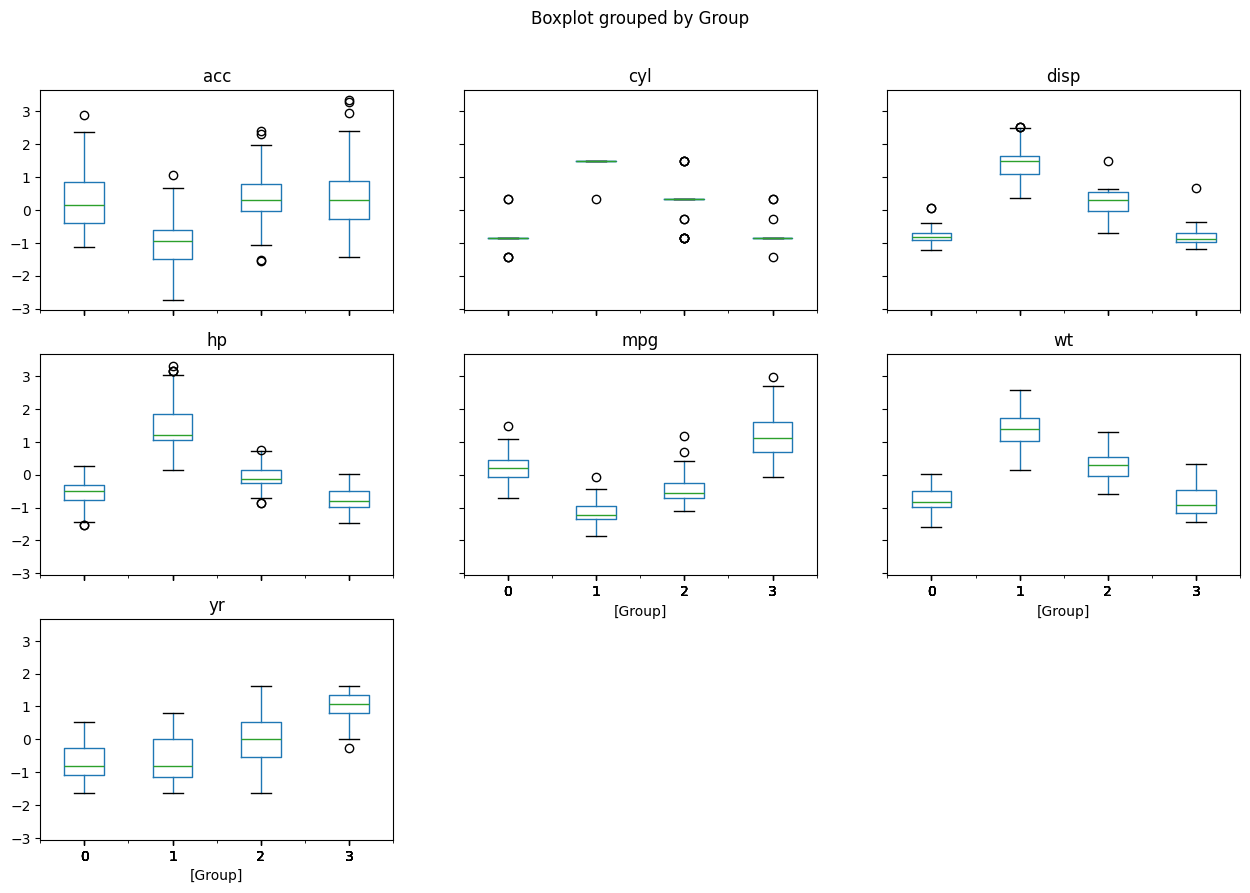

In [ ]:
cars_mpg_df_z.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)

We observe an overlapping of the clsuters at k = 4.

1. Clusters in cyl have high potential of having outliers.

2. Clusters in acc, hp, disp, and mpg have whiskers close to the whiskers.

3. Clusters in wt and yr have either no or very less outliers.

### **Clustering with k = 5**

In [ ]:
final_model=KMeans(5)
final_model.fit(cars_mpg_df_z)   # defines four clusters
prediction=final_model.predict(cars_mpg_df_z)  # captures which cluster each data point in the datset belongs to

#Append the prediction
cars_mpg_df_z["Group"] = prediction  # creating a new column in the dataframe to reflect which cluster a record belongs to

In [ ]:
cars_mpg_df_z.groupby(['Group']).count()

,cyl,disp,hp,wt,acc,yr,mpg
Group,,,,,,,
0,117,117,117,117,117,117,117
1,71,71,71,71,71,71,71
2,90,90,90,90,90,90,90
3,96,96,96,96,96,96,96
4,24,24,24,24,24,24,24


array([[<Axes: title={'center': 'acc'}, xlabel='[Group]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[Group]'>,
        <Axes: title={'center': 'disp'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'hp'}, xlabel='[Group]'>,
        <Axes: title={'center': 'mpg'}, xlabel='[Group]'>,
        <Axes: title={'center': 'wt'}, xlabel='[Group]'>],
       [<Axes: title={'center': 'yr'}, xlabel='[Group]'>, <Axes: >,
        <Axes: >]], dtype=object)

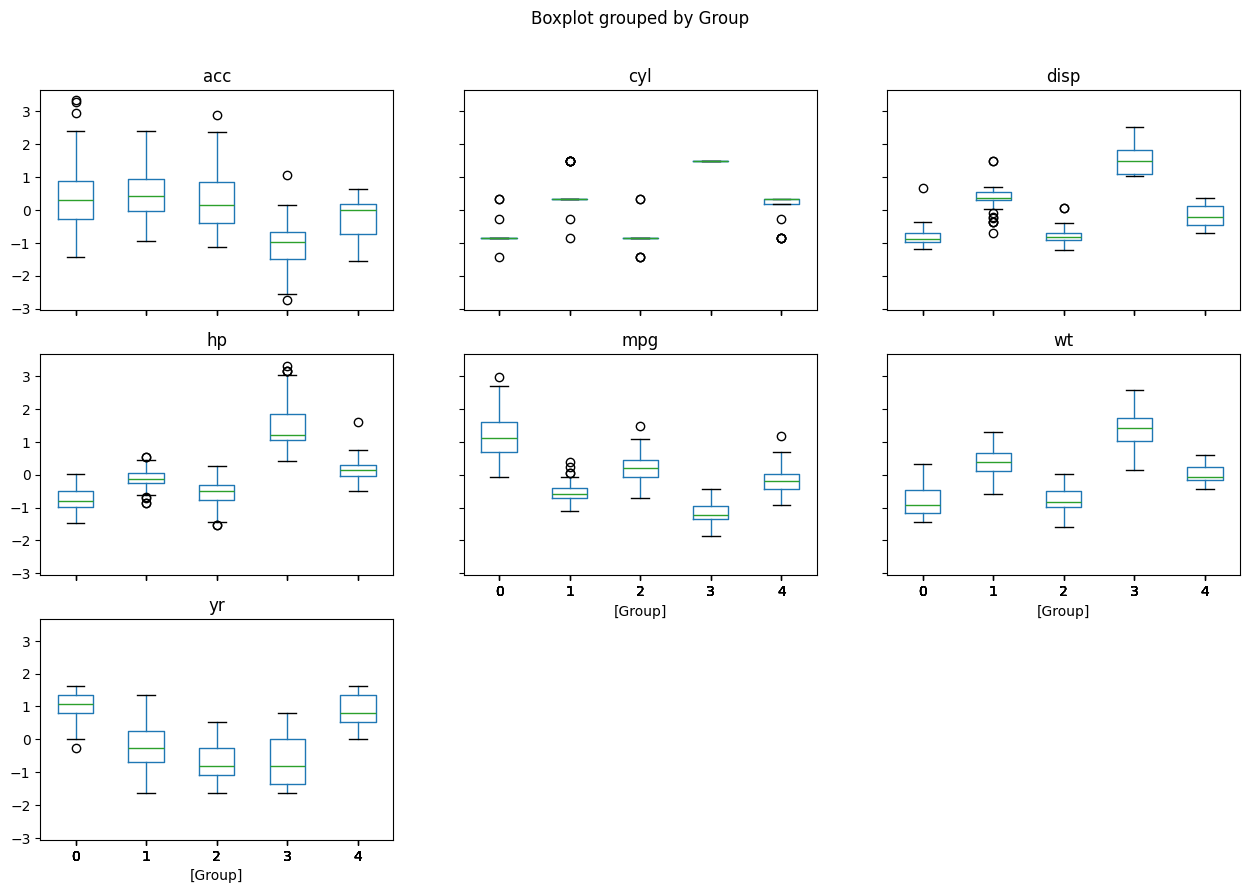

In [ ]:
cars_mpg_df_z.boxplot(by='Group',layout=(3,3),figsize=(15,10),grid=False)

The clsutering doesn't improve at k = 5 as there is overlapping in all the clsuetrs. No natural clusters exists beyond k = 4.

The overlapping box plots for clusters from k = 2 to k = 5 suggest that the features used for the clustering may not be ideal. When features are not effective at capturing the differences between clusters, it leads to similar distributions across them, causing this overlap. In contrast, well-chosen features that reflect distinct characteristics in the data should create clearer separation, resulting in more distinct box plots for each cluster.

1. Clusters in cyl have high potential of having outliers.

2. Clusters in acc, hp, disp, and mpg have whiskers close to the whiskers.

3. Clusters in wt and yr have either no or very less outliers.


**Conclusion:**

There are no natural clusters present in the dataset from k = 2 to k = 5.



## **2. Feature Selection Feature Engineering**

a. Identify and select the best features from the given data. Use heatmap and pairplot for the same and comment on the features.

I will use the dataframe cars_mpg_df to create heat map and pair plot.

We can do a correlation analysis between the attributes to understand the strength and direction of correlation between the dependent (mpg) , independent (other variables) and between the independent variables.

#### **Heat map**

(7.5, -0.5)

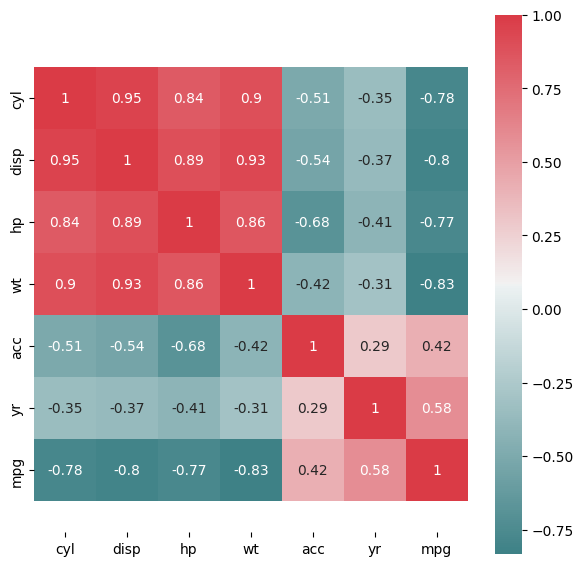

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
corr=cars_mpg_df.corr('pearson')
cp=sns.heatmap(corr,mask=np.zeros_like(corr,dtype=bool),cmap=sns.diverging_palette(200,10,as_cmap=True),square=True,ax=ax,annot=True)
bottom,top = cp.get_ylim()
cp.set_ylim(bottom+0.5,top-0.5) #matplotlib version to 3.1.1 has a bug in the plot and mistakes in the y-axis

#### **Observations:**

1. mpg has a strong negative correlation with cyl (-0.78), displacement (-0.8), hp (-0.77) and wt (-0.83). This is as per our understanding of the relation between these variables and mpg.
2. Between mpg and acc, yr we see a positive weak correlation.
3. As the yr ( year of manufacture) increases the car becomes younger in age and hence mileage is higher, this causes the positive correlation between mpg and year.
4. The correlation between mpg and acc is small and positive, the reason for this is small cars accelerate faster and also give higher mileage. However the weak correlation (0.42) is surprising as we expect to see a strong positive correlation.
5. The correlation between the cylinder and mpg columns is strong negative, this is due to the fact that as number of cylinders increase the loss due to friction and heat increase leading to lower mileage.
6. Between the attributes, such as horse power, weight, displacement and cylinder we see a strong positive colinearity (correlation between independent attributes). This shows that the attributes are not truly independent of each other.
7. We can use the columns cylinder, displacement, horesepower, weight and year to predict miles per gallon.
8. Corr plot gives a quantitative idea about the correlation but we also need to check whether the correlation is strictly linear or curved for which we will use pairplot.

#### **Pair plot analysis**

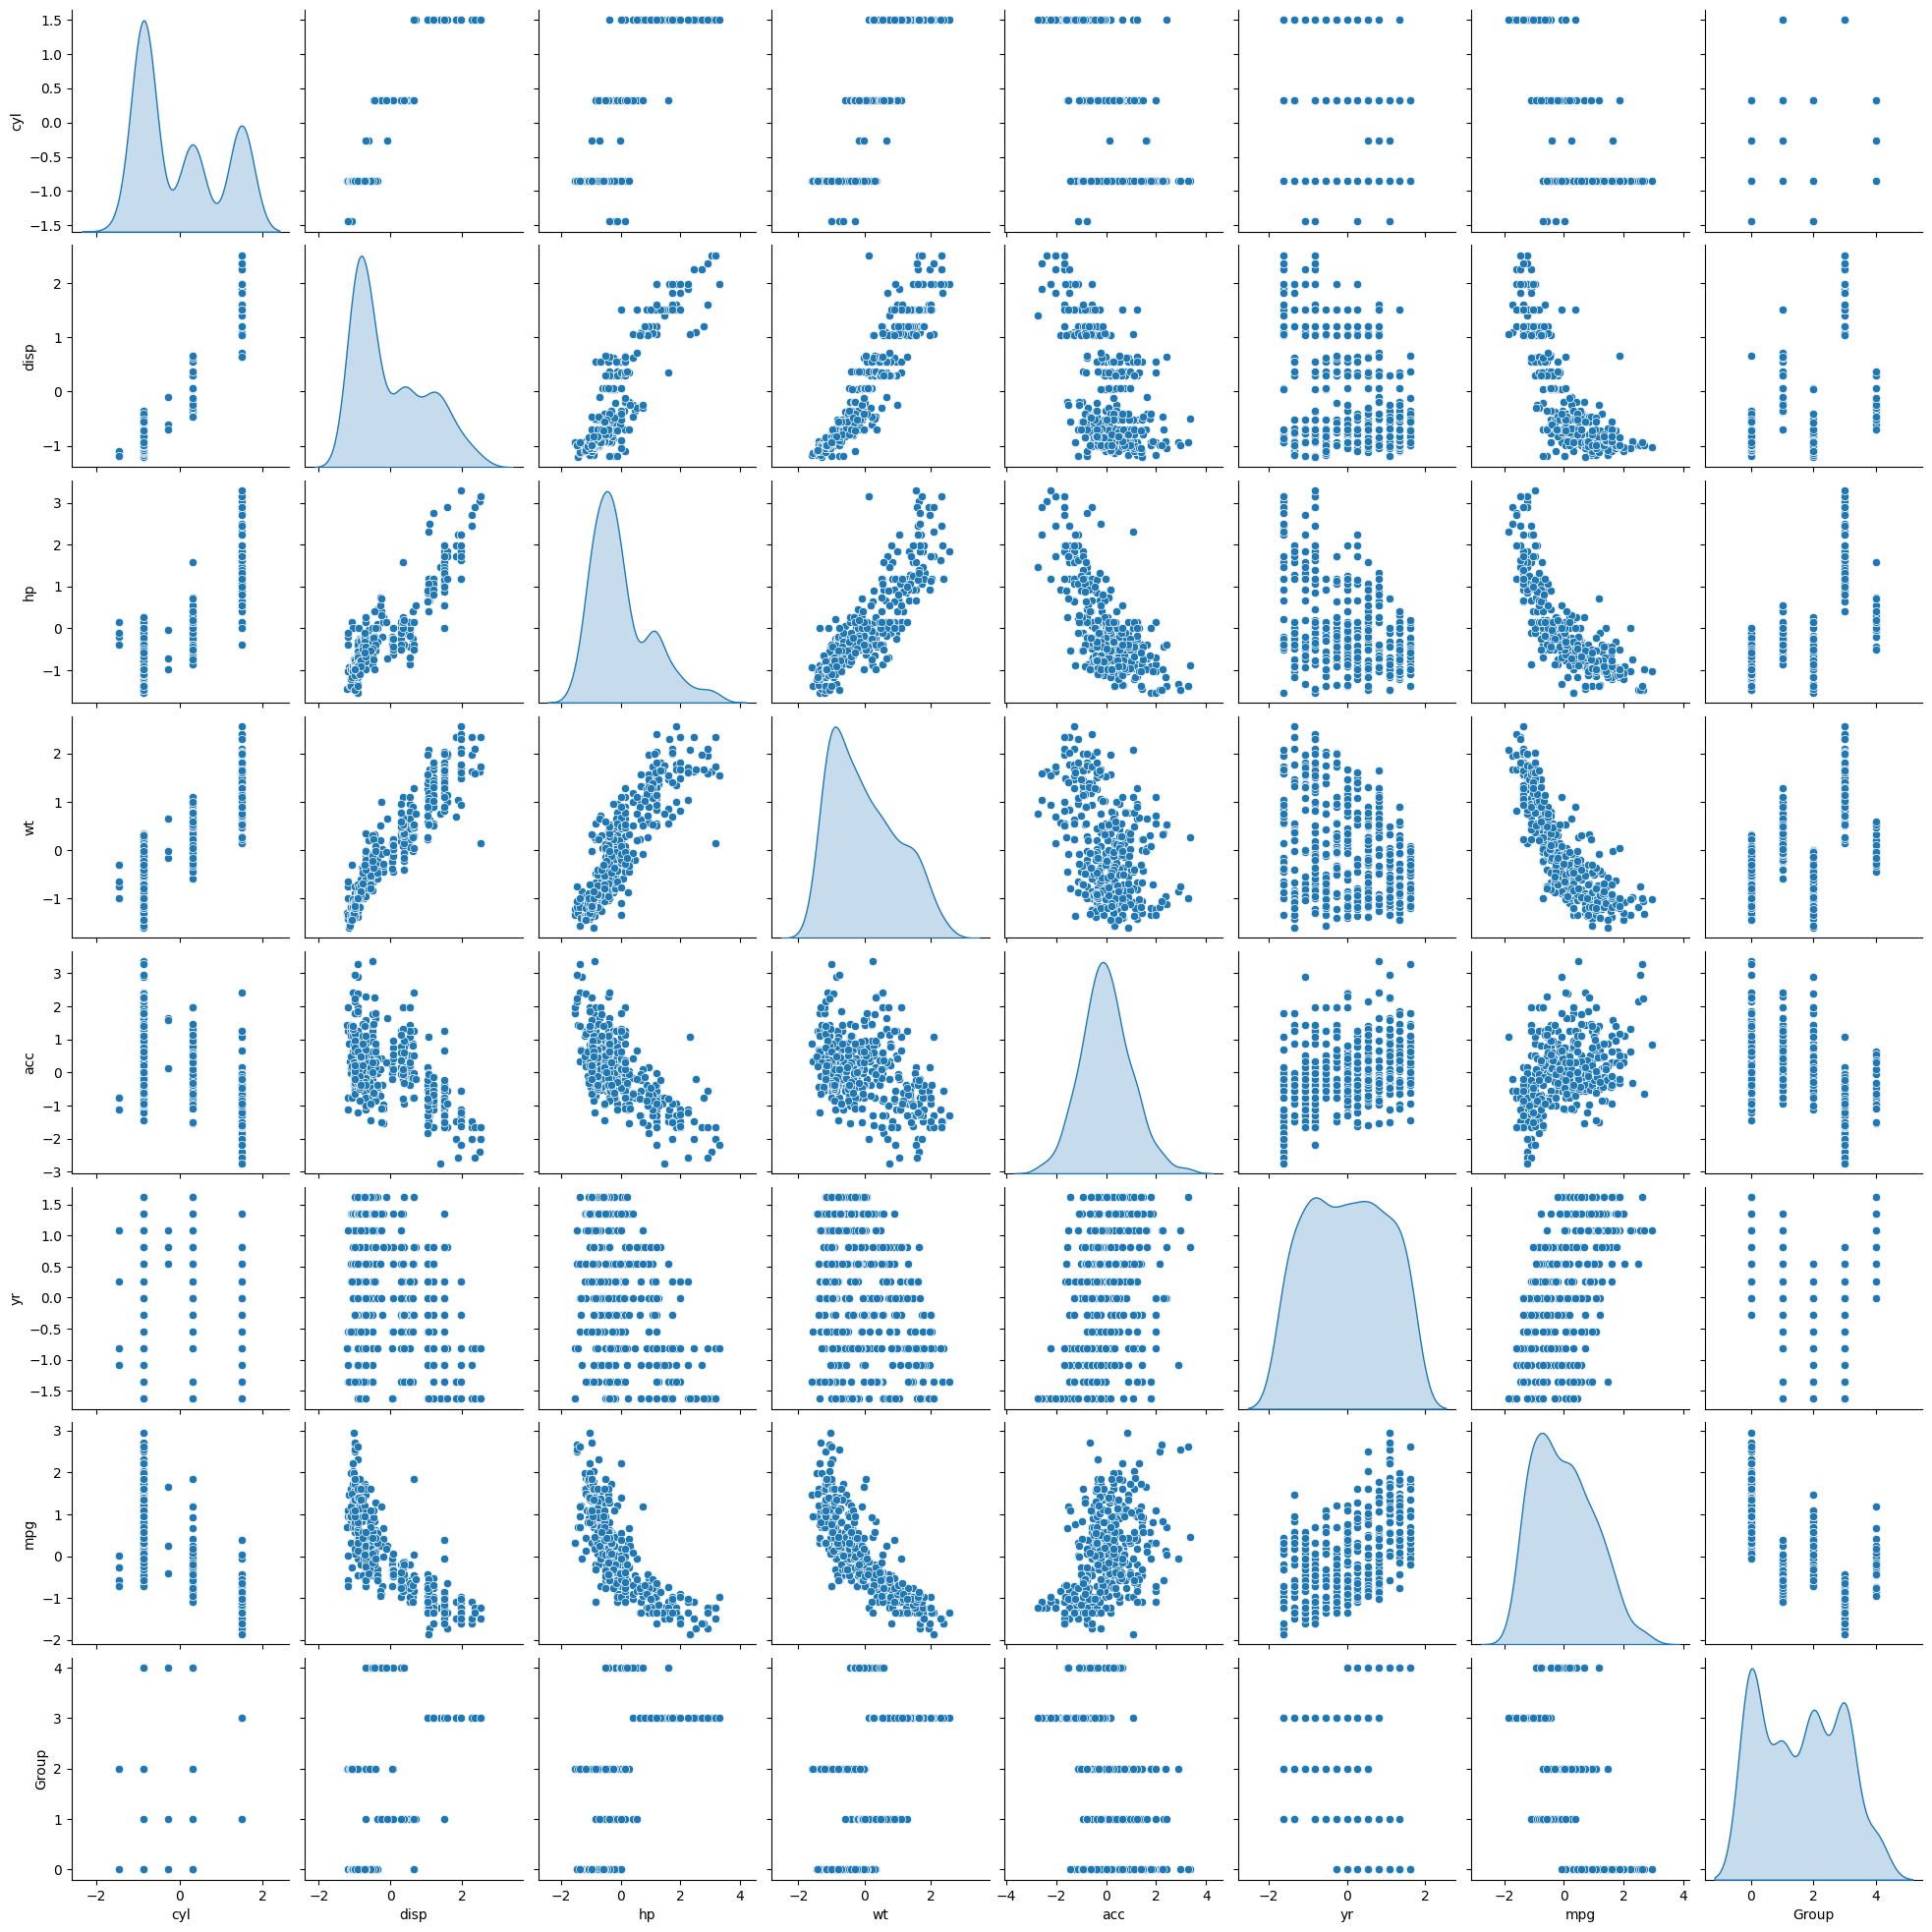

In [ ]:
sns.pairplot(cars_mpg_df_z,diag_kind='kde') # kde stands for kernel density estimate, i.e. how the distribution is in the population,
                                   # based on gaussian projection of the data at hand
                                   # using a mathematical function also called kernel.

Looking at the result, we can draw some conclusions about our dataset:

1. mpg is strongly correlated with cylinders, displacement , horsepower and weight .An increase in their values means a decrease in the mileage per gallon which seems right: a heavy vehicule, with a powerful engine and great horsepower would consume more energy, thus the low mileage per gallon.

2. The predictor attributes that we are intending to use in our analysis are also correlated.We suspect a multicollinearity. We will test and correct the eventual problem as we come further down our analysis.

3. We observe that the cylinder has weak features. Cylinders don’t seem to have any sort of linear relationship with any of the other features.

b. Comment on multicollinearity amongst the predictor attributes (if any) and your approach to deal with it if you did. Give reasons for your decision (whether you do something about multicollinearity or not).

High correlations (potential multicollinearity) include: cyl and disp (0.95), cyl and wt (0.90), disp and wt (0.93), disp and hp (0.89), hp and wt (0.86).

I will do a pair plot analysis, build a linear regression model for baseline analysis and compute VIF to determine the presence of multicollinearity.

c. Are there any features which are not good features but together they become strong?

No, there are no observable weak features that are together becoming strong.

d. Construct a baseline model using the entire feature set. Generate its performance report on training and testing. Is the model generalizing?

For this, I will create a linear regression regression model as a baseline.

In [ ]:
cars_mpg_df_lreg = cars_mpg_df_z.copy()

#### **Building the linear regression model: Baseline model**

I will build a linear regression model as a baseline model using the features: cyl,	disp,	hp, wt, acc, and yr as my X variables. mpg is my target (Y) variable.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = cars_mpg_df_lreg.drop(columns=["mpg"])  # Drop the target variable to form X
y = cars_mpg_df_lreg["mpg"]                 # Define the target variable y

# Splitting the data into training and test sets with a 70:30 split
X = cars_mpg_df_lreg.drop(columns=["mpg"])  # Drop the target variable to form X
y = cars_mpg_df_lreg["mpg"]                 # Define the target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Standardizing the independent variables
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # Fit and transform the training set
X_test_std = sc.transform(X_test)        # Transform the test set using the same scaler

# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Calculate R-squared for training and test sets
r2_train = regression_model.score(X_train_std, y_train)
r2_test = regression_model.score(X_test_std, y_test)

In [ ]:
# Print R-squared values
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Train): 0.813404458721257
R-squared (Test): 0.8540477747155991


The R^2 values of train and test are 0.81 and 0.85. The model has generalized.

In [ ]:
# Calculate Adjusted R-squared
n_train = X_train.shape[0]  # Number of training samples
p = X_train.shape[1]        # Number of predictors
n_test = X_test.shape[0]    # Number of test samples

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

In [ ]:
print("Adjusted R-squared (Train):", adj_r2_train)
print("Adjusted R-squared (Test):", adj_r2_test)

Adjusted R-squared (Train): 0.8085667965399562
Adjusted R-squared (Test): 0.844925760635324


The adjusted R^2 values of train and test are 0.81 and 0.84. The model has generalized.

In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for Training Data
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_train = calculate_vif(X_train_std_df)
print("VIF for Training Data:")
print(vif_train)

# Calculate VIF for Test Data
X_test_std_df = pd.DataFrame(X_test_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_test = calculate_vif(X_test_std_df)
print("\nVIF for Test Data:")
print(vif_test)

VIF for Training Data:
  Feature        VIF
0     cyl  12.416214
1    disp  23.265083
2      hp   8.825943
3      wt  11.715698
4     acc   2.446648
5      yr   1.414304
6   Group   2.305822

VIF for Test Data:
  Feature        VIF
0     cyl  11.418274
1    disp  22.661211
2      hp  12.557866
3      wt   9.698668
4     acc   2.977468
5      yr   1.469438
6   Group   2.066718


The VIF of wt, hp, disp, and cyl are more than 4. Generally, a VIF above 4 or indicates that multicollinearity might exist, and further investigation is required. When VIF is higher than 10, there is significant multicollinearity that needs to be corrected.

Source: https://corporatefinanceinstitute.com/resources/data-science/variance-inflation-factor-vif/

Since, disp, hp, acc, etc. are important for a car performance, I won't drop them but combine them to generate new features and build a model using them.

In [ ]:
new_features_df = cars_mpg_df.copy()

# Creating new features (ratios) and explaining the reasoning
new_features_df['hp_per_wt'] = new_features_df['hp'] / new_features_df['wt']  # Power-to-weight ratio, to understand engine performance relative to car weight
new_features_df['yr_per_wt'] = new_features_df['yr'] / new_features_df['wt']  # Year-to-weight ratio, to see how newer cars relate to their weight
new_features_df['hp_per_disp'] = new_features_df['hp'] / new_features_df['disp']  # Horsepower-to-displacement ratio, for engine efficiency
new_features_df['disp_per_wt'] = new_features_df['disp'] / new_features_df['wt']  # Displacement-to-weight ratio, to see how engine size compares to car weight
new_features_df['acc_per_wt'] = new_features_df['acc'] / new_features_df['wt']  # Acceleration-to-weight ratio, to understand acceleration relative to car weight
new_features_df['hp_per_cyl'] = new_features_df['hp'] / new_features_df['cyl']  # Horsepower-to-cylinder ratio, to assess engine power efficiency per cylinder

# Defining X (features) and y (target)
X = new_features_df.drop(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], axis=1)  # Drop 'mpg' and the original features from X
y = new_features_df['mpg']  # Keep 'mpg' as the target variable

# Display the new dataframe with added features
X.head()

,hp_per_wt,yr_per_wt,hp_per_disp,disp_per_wt,acc_per_wt,hp_per_cyl
0,0.037100,0.019977,0.423453,0.087614,0.003425,16.250
1,0.044679,0.018955,0.471429,0.094774,0.003114,20.625
2,0.043655,0.020373,0.471698,0.092549,0.003201,18.750
3,0.043694,0.020390,0.493421,0.088552,0.003495,18.750
4,0.040591,0.020296,0.463576,0.087562,0.003044,17.500


In [ ]:
# Splitting the data into training and test sets with a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Standardizing the independent variables
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # Fit and transform the training set
X_test_std = sc.transform(X_test)        # Transform the test set using the same scaler

# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Calculate R-squared for training and test sets
r2_train = regression_model.score(X_train_std, y_train)
r2_test = regression_model.score(X_test_std, y_test)

In [ ]:
# Print R-squared values
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Train): 0.8236715962474177
R-squared (Test): 0.8369372368705034


The R^2 values of train and test are 0.83 and 0.84. The model has generalized.

In [ ]:
# Calculate Adjusted R-squared
n_train = X_train.shape[0]  # Number of training samples
p = X_train.shape[1]        # Number of predictors
n_test = X_test.shape[0]    # Number of test samples

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

In [ ]:
print("Adjusted R-squared (Train):", adj_r2_train)
print("Adjusted R-squared (Test):", adj_r2_test)

Adjusted R-squared (Train): 0.8197676463488366
Adjusted R-squared (Test): 0.8282790370583177


The adjusted R^2 values of train and test are 0.82 and 0.83. The model has generalized.

In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for Training Data
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_train = calculate_vif(X_train_std_df)
print("VIF for Training Data:")
print(vif_train)

# Calculate VIF for Test Data
X_test_std_df = pd.DataFrame(X_test_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_test = calculate_vif(X_test_std_df)
print("\nVIF for Test Data:")
print(vif_test)

VIF for Training Data:
       Feature        VIF
0    hp_per_wt   8.904980
1    yr_per_wt   7.650092
2  hp_per_disp  17.883023
3  disp_per_wt  19.527236
4   acc_per_wt   7.307923
5   hp_per_cyl   4.410552

VIF for Test Data:
       Feature        VIF
0    hp_per_wt  12.935125
1    yr_per_wt   9.615401
2  hp_per_disp  17.558600
3  disp_per_wt  24.833470
4   acc_per_wt   8.625271
5   hp_per_cyl   4.290837


There is still high multi-collinearity among the features except hp_per_cyl.

#### **Conclusion:**

Feature selection needs to be done as multicollinearity still exists in the model with high VIF values.

Next steps: I will use statistical feature selection techniques to first select features, and then create a model_1 and compare with the baseline.

###  **Statistical Feature Selection**

I will be using statistical techniques for feature selection. Statistical tests do not work on -ve values on input X. We cannot run it on the z scored data.

**Selecting Features by Recursive Feature Elimination using SKlearn RFE**

In [ ]:
cars_mpg_df_rfe = cars_mpg_df.copy()

https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.r_regression.html

In [ ]:
# Feature Extraction with RFE

from sklearn.feature_selection import r_regression
# from sklearn.model_selection import train_test_split
import pandas as pd

# Selecting the feature matrix (X_rfe) and the target variable (Y_rfe)
X_rfe = cars_mpg_df_rfe[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']]  # Features
Y_rfe = cars_mpg_df_rfe['mpg']  # Target variable (continuous)

# Spliting the data into training and testing sets
X_train_rfe, X_test_rfe, Y_train_rfe, Y_test_rfe = train_test_split(X_rfe, Y_rfe, test_size=0.3, random_state=42)

# Computing Pearson's r for each feature with the target variable
r_scores_rfe = r_regression(X_train_rfe, Y_train_rfe, center=True)

In [ ]:
# Feature ranking

# Creating a DataFrame for easier visualization, using absolute Pearson_r values
feature_scores_rfe = pd.DataFrame({
    'Feature': X_rfe.columns,
    'Pearson_r': abs(r_scores_rfe)  # Use absolute values of Pearson_r
}).sort_values(by='Pearson_r', ascending=False)

# Printing the results
print("Feature Scores (by Pearson's r):")
print(feature_scores_rfe)

# Selecting the top 3 features based on the absolute value of Pearson's r
top_features_rfe = feature_scores_rfe.nlargest(3, 'Pearson_r')['Feature']
print("\nTop 3 Features:", list(top_features_rfe))

Feature Scores (by Pearson's r):
  Feature  Pearson_r
3      wt   0.823415
1    disp   0.802319
0     cyl   0.767427
2      hp   0.753300
5      yr   0.584703
4     acc   0.376362

Top 3 Features: ['wt', 'disp', 'cyl']


**Selecting Features using  Bayesian Ridge Regression**

In [ ]:
cars_mpg_df_byrg = cars_mpg_df.copy()

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html

https://www.nature.com/articles/s41598-024-54515-w

In [ ]:
from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import train_test_split

# Selecting the feature matrix (X_byrg) and the target variable (Y_byrg)
X_byrg = cars_mpg_df_byrg.drop('mpg', axis=1)  # Independent variables
Y_byrg = cars_mpg_df_byrg['mpg']  # Target variable

# Standardizing the features (important for Bayesian Ridge Regression)
scaler = StandardScaler()
X_byrg_scaled = scaler.fit_transform(X_byrg)

# Spliting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_byrg_scaled, Y_byrg, test_size=0.3, random_state=42)

# Initializing and fit the Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, Y_train)

# Getting the coefficients (important for feature selection)
coefficients = model.coef_

In [ ]:
# Creating a dataframe of feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_byrg.columns,
    'Coefficient': coefficients
})

# Adding absolute value of coefficients to facilitate ranking
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# Sorting the features by absolute coefficient value to identify the most important ones
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Displaying the sorted feature importance
print("Feature Importance:")
print(feature_importance)

# Creating feature ranking based on the absolute value of coefficients
feature_rank_byrg = [(rank + 1, item, score) for rank, (item, score) in enumerate(feature_importance[['Feature', 'Abs_Coefficient']].values)]

# Printing the top 3 features
top_3_features = [item for rank, item, score in feature_rank_byrg[:3]]
print(f"\nTop 3 Features: {top_3_features}")

Feature Importance:
  Feature  Coefficient  Abs_Coefficient
3      wt    -5.343424         5.343424
5      yr     2.905730         2.905730
1    disp    -0.792229         0.792229
0     cyl     0.320183         0.320183
4     acc     0.239081         0.239081
2      hp     0.199642         0.199642

Top 3 Features: ['wt', 'yr', 'disp']


**Ensembling to Select Features by ExtraTreesRegressor**

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

https://bobrupakroy.medium.com/extra-trees-classifier-regressor-5b5f6abe8228

In [ ]:
cars_mpg_df_extr = cars_mpg_df.copy()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.model_selection import train_test_split

# Selecting the feature matrix (X) and the target variable (Y)
X_extr = cars_mpg_df_extr.drop('mpg', axis=1)  # Features (independent variables)
Y_extr = cars_mpg_df_extr['mpg']  # Target variable

# Standardizing the features (important for tree-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_extr)

# Spliting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_extr, test_size=0.3, random_state=42)

# Initializing and fit the ExtraTreesRegressor model
extr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators for more trees
extr_model.fit(X_train, Y_train)

# Getting feature importance from Extra Trees
extr_importance = extr_model.feature_importances_

In [ ]:
# Ranking the features based on their importance score
extr_importance_rank = [(item, score) for item, score in zip(X_extr.columns, extr_importance)]
extr_importance_sorted = sorted(extr_importance_rank, key=lambda x: x[1], reverse=True)

# Printing Feature Ranking (Descending by Importance)
print("Extra Trees Feature Importance Ranking (Descending):")
for feature, score in extr_importance_sorted:
    print(f"Feature: {feature}, Importance Score: {score}")

# Identifying the top 3 important features based on the ranking
top_3_extr = [feature for feature, score in extr_importance_sorted[:3]]

print(f"\nTop 3 Features from Extra Trees: {top_3_extr}")

Extra Trees Feature Importance Ranking (Descending):
Feature: cyl, Importance Score: 0.28951440379466664
Feature: disp, Importance Score: 0.2549848924985702
Feature: wt, Importance Score: 0.17669847342748934
Feature: yr, Importance Score: 0.1504723020591955
Feature: hp, Importance Score: 0.09559865859554022
Feature: acc, Importance Score: 0.032731269624538054

Top 3 Features from Extra Trees: ['cyl', 'disp', 'wt']


Since **'cyl', 'disp', 'wt'** have got the highest frequency of occurence across three classification methods as the top 3 features, I will use them to create a linear regression model which would be my model_1.

e. Create model_1 on selected features and compare its performance with baseline model and report your findings.

#### **Building the linear regression model: model_1**

In [ ]:
cars_mpg_df_model_1 = cars_mpg_df.copy()

In [ ]:
# Defining predictor variables and target variable
X = cars_mpg_df_model_1[['cyl', 'disp', 'wt']]
y = cars_mpg_df_model_1['mpg']

# Splitting the data into training and test sets with a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Standardizing the independent variables
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  # Fit and transform the training set
X_test_std = sc.transform(X_test)        # Transform the test set using the same scaler

# Fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train_std, y_train)

LinearRegression()

In [ ]:
# Calculate R-squared for training and test sets
r2_train = regression_model.score(X_train_std, y_train)
r2_test = regression_model.score(X_test_std, y_test)

In [ ]:
# Print R-squared values
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Train): 0.6794172279168862
R-squared (Test): 0.7429209168795314


The R^2 values of train and test are 0.68 and 0.75. The model has became worse than the training and thje test model that we have for baseline. We need to check the adjusted R^2 values. There is over fitting.

In [ ]:
# Calculate Adjusted R-squared
n_train = X_train.shape[0]  # Number of training samples
p = X_train.shape[1]        # Number of predictors
n_test = X_test.shape[0]    # Number of test samples

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

In [ ]:
print("Adjusted R-squared (Train):", adj_r2_train)
print("Adjusted R-squared (Test):", adj_r2_test)

Adjusted R-squared (Train): 0.6759071975656112
Adjusted R-squared (Test): 0.7362723199022779


The adjusted R^2 values of train and test are 0.68 and 0.74. The model has became than the baseline model. There is over fitting.

In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF for Training Data
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_train = calculate_vif(X_train_std_df)
print("VIF for Training Data:")
print(vif_train)

# Calculate VIF for Test Data
X_test_std_df = pd.DataFrame(X_test_std, columns=X.columns)  # Convert standardized data to DataFrame
vif_test = calculate_vif(X_test_std_df)
print("\nVIF for Test Data:")
print(vif_test)

VIF for Training Data:
  Feature        VIF
0     cyl  11.412972
1    disp  18.374624
2      wt   8.109442

VIF for Test Data:
  Feature        VIF
0     cyl   9.215442
1    disp  12.523509
2      wt   7.373916


High multi-collinearity still exists.

**Conclusion:**

**Model_1** formed after feature selection, **does not** perform well with respect to the **baseline model** as **high multicollinearity** still exists.

## **3. Principle Component Analysis**

a. Will PCA be effective on the original standardized dataset? Do you notice strong collinearity among most variables?

**PCA (Principal Component Analysis)** can be effective on the **original standardized dataset**, and in fact, it is often recommended to **standardize** the dataset before applying PCA, especially when the features have different scales.

b. Perform PCA on the standardized dataset and generate eigen vector eigen value and cumulative eigen value chart.

In [ ]:
cars_mpg_df_pca = cars_mpg_df.copy()

I am not dropping any feature from the data set before doing PCA.

In [ ]:
X = cars_mpg_df_pca[cars_mpg_df_pca.columns[0:-1]]   # The last column index is -1 and that is not considered in the range
y = cars_mpg_df_pca["mpg"]

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Centering the data in independent variables

sc = StandardScaler()    # PCA is always done on scaled data

X_train_std =  sc.fit_transform(X_train)

train_cov_matrix = np.cov(X_train_std.T)    # Very important - the target variable is never part of PCA analysis

print('Correlation Matrix \n%s', train_cov_matrix)  # The quantities in the matrix should reflect the observations in pairplot

Correlation Matrix 
%s [[ 1.00361011  0.95863099  0.85181579  0.89847166 -0.50494707 -0.35251336]
 [ 0.95863099  1.00361011  0.88795091  0.93969096 -0.53318543 -0.35855376]
 [ 0.85181579  0.88795091  1.00361011  0.87023963 -0.6722301  -0.37892805]
 [ 0.89847166  0.93969096  0.87023963  1.00361011 -0.4159673  -0.29284492]
 [-0.50494707 -0.53318543 -0.6722301  -0.4159673   1.00361011  0.26300053]
 [-0.35251336 -0.35855376 -0.37892805 -0.29284492  0.26300053  1.00361011]]


In [ ]:
# Matrix decomposition

eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.45928729 -0.1367308  -0.18371441 -0.60621156 -0.44854964  0.40978   ]
 [-0.47015092 -0.13884967 -0.15869434 -0.25796975  0.80416858 -0.14580635]
 [-0.46260867 -0.04690028  0.11717611  0.66508924  0.06112207  0.56919569]
 [-0.44909581 -0.22564871 -0.28650731  0.31482723 -0.37531489 -0.65217461]
 [ 0.32054919 -0.12713651 -0.8895654   0.15648056  0.08386173  0.2413275 ]
 [ 0.22263799 -0.94485173  0.23221076 -0.00362048  0.02204875  0.05715288]]

 Eigen Values 
%s [4.24472244 0.84654901 0.69013177 0.13863001 0.03239618 0.06923123]


Each principal component expressed in the original 6 directions (dimensions).

Eigen values are not sorted.

In [ ]:
# Sorting the Eigen values in descending order (The order may not be descending by default as in the example above)

# Making a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(4.244722440042544,
  array([-0.45928729, -0.1367308 , -0.18371441, -0.60621156, -0.44854964,
          0.40978   ])),
 (0.8465490115927884,
  array([-0.47015092, -0.13884967, -0.15869434, -0.25796975,  0.80416858,
         -0.14580635])),
 (0.6901317706764988,
  array([-0.46260867, -0.04690028,  0.11717611,  0.66508924,  0.06112207,
          0.56919569])),
 (0.13863001190692242,
  array([-0.44909581, -0.22564871, -0.28650731,  0.31482723, -0.37531489,
         -0.65217461])),
 (0.06923123095009087,
  array([ 0.22263799, -0.94485173,  0.23221076, -0.00362048,  0.02204875,
          0.05715288])),
 (0.03239618465065991,
  array([ 0.32054919, -0.12713651, -0.8895654 ,  0.15648056,  0.08386173,
          0.2413275 ]))]

In [ ]:
# Separating the sorted Eigen values and Eigen vectors for subsequent use in graphing

train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[4.244722440042544, 0.8465490115927884, 0.6901317706764988, 0.13863001190692242, 0.06923123095009087, 0.03239618465065991]


**Eigen values** are **amount** of information in an **eigen vector**.

The eigen values are now in the same order as the eigen vector.

In [ ]:
# Convert the Eigen values to %age of total covariance explained and create a cumulative sum

tot = sum(eigenvalues) # Sum up all the Eigen values to reflect the total covariance captured from original feature space


#%age of total covariance explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]
# array of variance explained by each Eigen vector will be generated

var_explained = [(i / tot) for i in train_eigvalues_sorted]




# an array of cumulative covariance captured by the Eigen vectors together

cum_var_exp = np.cumsum(var_explained)

In [ ]:
print(var_explained)

[0.7049089423811649, 0.1405839785438861, 0.11460821371546155, 0.023021890466557227, 0.011497032957539054, 0.005379941935391356]


Each value represents the **proportion** of the total variance in the data captured by the corresponding principal component. For example, the first component explains **70.49%** of the total variance, while the second explains **14.06%**.

In [ ]:
print(cum_var_exp)

[0.70490894 0.84549292 0.96010113 0.98312303 0.99462006 1.        ]


These values show the **total variance** captured when considering multiple components together. For instance, the first two components together explain **84.55%** of the variance, while the first three explain **96.01%**.

* This is important because higher variance explained by fewer components means the data can be represented in fewer dimensions without much loss of information. Here, the first three components already account for 96%, making them quite sufficient.

* Components beyond the third don’t contribute much—like the fifth and sixth components, which explain only 1.14% and 0.54%, respectively—so they’re less relevant for analysis.

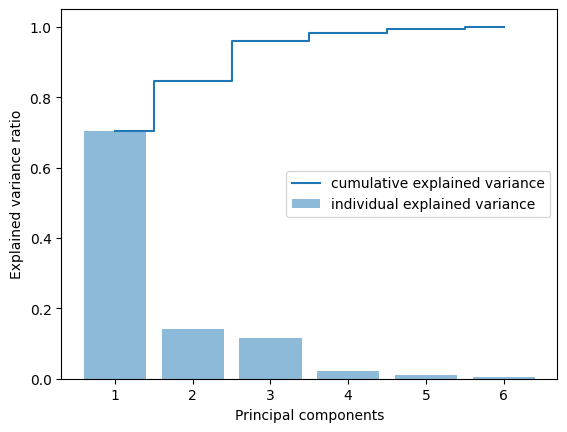

In [ ]:
# Ploting the % covariance captured by each Eigen vector and the cumulative covariance

plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

We can observe 3 good to moderate features and 3 bad features. I will drop the last three features. This is also supported by the cumulative variance.

c. Reduce number of dimensions (drop eigen vectors) and recreate the model as model_2. Share the model performance metrics and compare with the baseline model and model_1 performance.

In [ ]:
#  Dropping principal components that capture insignificant amount of the covariance compared to others and project the original data into the reduced PC dimension space

P_reduce = np.array(train_eigvectors_sorted[0:3])   # In this case using all the three PC dimensions- not reducing  actually

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_train_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [ ]:
Proj_train_data_df.head()

,0,1,2
0,1.930731,0.468012,0.503761
1,-0.432853,3.354153,-0.688894
2,0.215056,0.529618,-0.057225
3,-1.447474,-3.029290,-1.065359
4,1.912199,0.855082,0.368913


#### **Building the model**

In [ ]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(Proj_train_data_df, y_train)

regression_model.coef_

array([4.12091769, 1.05892061, 0.92502331])

In [ ]:
regression_model.score(Proj_train_data_df, y_train)

0.7567629100831066

The R^2 on the training data is 0.76 which is less than the baseline_0 and baseline_1 but more than model_1.

Testing the model on projected test data i.e. test data mapped to PC dimension feature space

In [ ]:
X_test_std =  sc.fit_transform(X_test) # Standardize the test data using Zscores -  centring the data


X_test_std_3D = np.dot(X_test_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_test_data_df = pd.DataFrame(X_test_std_3D)  # converting array to dataframe for pairplot

In [ ]:
Proj_test_data_df.shape

(120, 3)

Model_2 now has 120 records and 3 features.

In [ ]:
regression_model.score(Proj_test_data_df, y_test)

0.8042034988414939

The R^2 on the test data is 0.80 which is similar to the baseline_0 and baseline_1 but more than model_1.


#### **Conclusion:**

PCA didn't improve the model performance with respect to the baseline models.

d. List the benefits of and drawbacks of PCA.

#### **Benefits of PCA**:

1. **Reduces Dimensionality:** Simplifies the dataset by retaining the most important features, making it easier to analyze and reducing computational costs.

2. **Mitigates Multicollinearity:** Transforms correlated variables into uncorrelated principal components, addressing multicollinearity issues in models.

3. **Improves Model Stability and Generalization:** Helps create more stable models by removing redundancy, improving performance on unseen data.

4. **Enhances Computational Efficiency:** Reduces the number of features, leading to faster model training and lower memory usage.

5. **Facilitates Data Visualization:** Enables visualization of high-dimensional data in 2D or 3D, aiding in identifying patterns or clusters.


#### **Drawbacks of PCA**:

1. **Loss of Interpretability:** Principal components are linear combinations of features, making them difficult to interpret in real-world terms.

2. **Potential Loss of Information:** Some detail may be lost when reducing dimensions, especially if too few components are retained.

3. **Assumption of Linearity:** PCA assumes linear relationships, which may not capture complex, nonlinear structures in the data.

4. **Sensitive to Scaling:**Features must be standardized, as PCA is influenced by the scale of variables, leading to skewed results if not normalized.

5. **Does Not Work Well with Categorical Data:** PCA is designed for numerical data, so it is not effective on datasets with many categorical features.

6. **Component Selection Can Be Subjective:** Deciding how many components to keep can be subjective and impact model performance.